In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
url='https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day25-normalization/wine_data.csv'
df=pd.read_csv(url, usecols=[0,1,2])
df.columns=['Class label', 'Alcohol', 'Malic acid']

In [3]:
df

,Class label,Alcohol,Malic acid
0,1,13.20,1.78
1,1,13.16,2.36
2,1,14.37,1.95
3,1,13.24,2.59
4,1,14.20,1.76
...,...,...,...
172,3,13.71,5.65
173,3,13.40,3.91
174,3,13.27,4.28
175,3,13.17,2.59


<AxesSubplot:xlabel='Alcohol', ylabel='Density'>

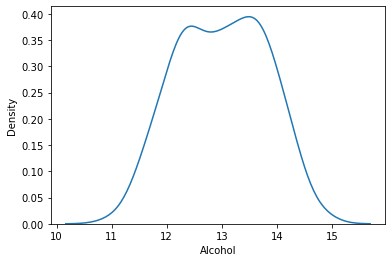

In [6]:
sns.kdeplot(df['Alcohol'])

<AxesSubplot:xlabel='Malic acid', ylabel='Density'>

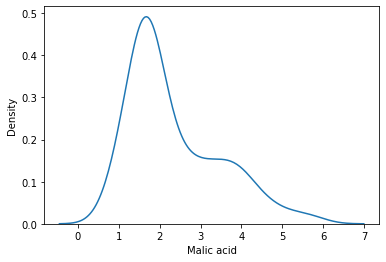

In [8]:
sns.kdeplot(df['Malic acid'])

C:\Users\home\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Alcohol', ylabel='Malic acid'>

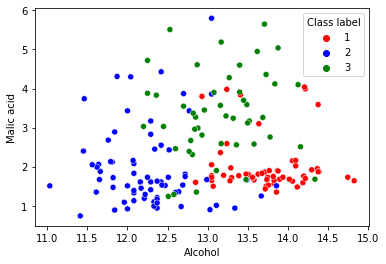

In [9]:
color_dict={1:'red',2:'blue',3:'green'}
sns.scatterplot(df['Alcohol'],df['Malic acid'], hue=df['Class label'], palette=color_dict)

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop('Class label', axis=1),
                                                 df['Class label'],
                                                 test_size=0.3,
                                                 random_state=0)
X_train.shape, X_test.shape

((123, 2), (54, 2))

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

# fir the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [13]:
X_train_scaled=pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [14]:
np.round(X_train.describe(),1)

,Alcohol,Malic acid
count,123.0,123.0
mean,13.0,2.3
std,0.8,1.2
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.8
75%,13.6,3.1
max,14.8,5.8


In [15]:
np.round(X_train_scaled.describe(),1)

,Alcohol,Malic acid
count,123.0,123.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.1
50%,0.5,0.2
75%,0.7,0.4
max,1.0,1.0


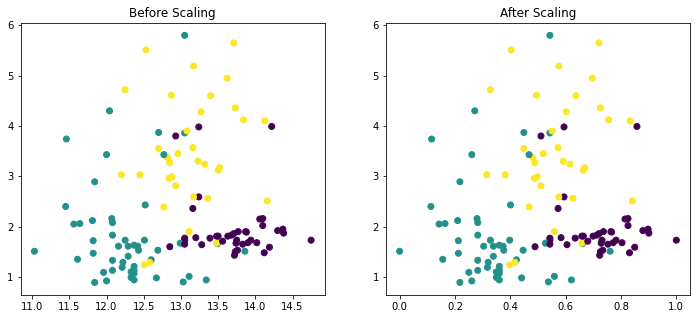

In [16]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(X_train['Alcohol'], X_train['Malic acid'], c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Alcohol'], X_train['Malic acid'], c=y_train)
ax2.set_title("After Scaling")
plt.show()

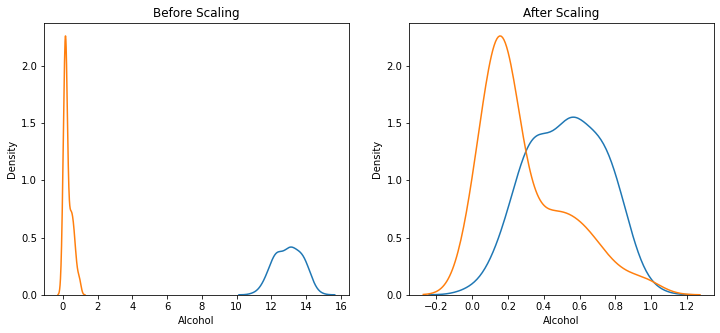

In [17]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

# before scaling
ax1.set_title("Before Scaling")
sns.kdeplot(X_train['Alcohol'], ax=ax1)
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax1)

# after scaling
ax2.set_title("After Scaling")
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
plt.show()

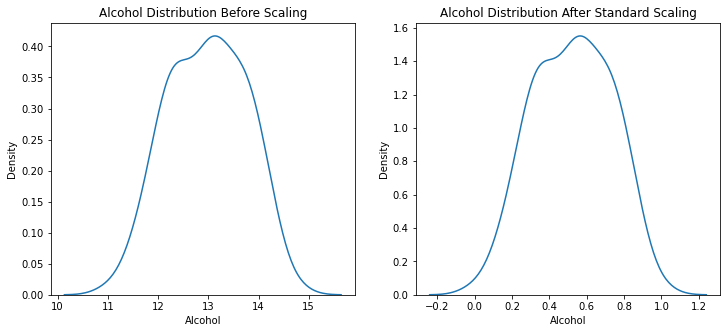

In [18]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Alcohol Distribution Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)

# after scaling
ax2.set_title('Alcohol Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
plt.show()

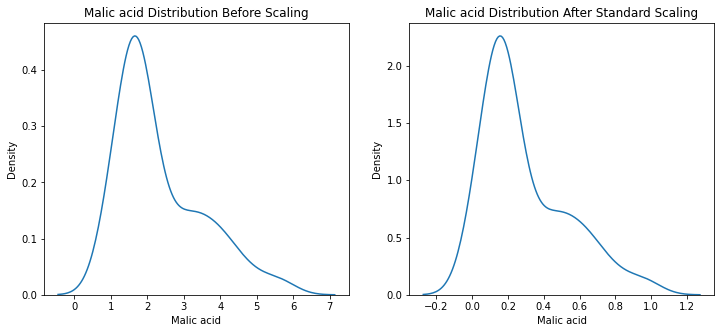

In [19]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Malic acid Distribution Before Scaling')
sns.kdeplot(X_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('Malic acid Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
plt.show()